# İstatistik Nedir?

- İstatistik, belirli bir amaç için veri toplama, tablo ve grafiklerle özetleme, sonuçları yorumlama, sonuçların güven derecelerini açıklama, örneklerden elde edilen sonuçları kitle için genelleme, özellikler arasındaki ilişkiyi araştırma, çeşitli konularda geleceğe ilişkin tahmin yapma, deney düzenleme ve gözlem ilkelerini kapsayan bir bilimdir. Belirli bir amaç için verilerin toplanması, sınıflandırılması, çözümlenmesi ve sonuçlarının yorumlanması esasına dayanır.
- Fizik, doğa bilimleri ve sosyal bilimlere kadar geniş bir alanda uygulanabilmektedir. Aynı zamanda iş dünyası ve hükümetle ilişkili tüm alanlarda karar almak amacıyla kullanılır. İstatistik yukarıdaki anlamıyla teklidir. Sözcüğün çoğul anlamı, "sistemli bir şekilde toplanan sayısal bilgiler"dir. Örnek olarak nüfus istatistikleri, çevre istatistikleri, spor istatistikleri, millî eğitim istatistikleri verilebilir.
- İstatistiği öğrenmedeki amaç, bir araştırmada elde edilen verilerin uygun istatistiksel yöntemler kullanılarak yorumlanacağını bilmektir.
- İstatistiğin diğer bölümlerle olan ilişkilerinden doğan kavramlar şu şekilde gösterilebilir: Ekonomi+İstatistik = Ekonometri, Psikoloji+İstatistik = Psikometri, Tıp+İstatistik = Biyoistatistik, Sosyoloji+İstatistik = Sosyometri, Tarih+İstatistik = Kliometri.

In [3]:
# kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
from scipy import stats # istatistik kütüphanesi
import seaborn as sns
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-bright")

import warnings
warnings.filterwarnings('ignore')

# Veri Nedir?

**Veri**, ham bilgi ya da gözlemlerden oluşan bir kavramdır. Bir araştırma, analiz veya karar verme süreci için kullanılmak üzere elde edilen ve kaydedilen bilgi parçacıklarıdır. Veri, ölçümler, sayılar, metinler, görüntüler, ses kayıtları ya da başka türde ham bilgiler şeklinde olabilir.

## Verinin Özellikleri
1. **Ham Bilgi**: Veri, bir analiz sürecinden önce genellikle işlenmemiş ve anlamlandırılmamış bilgidir.  
2. **Objektif veya Subjektif**: Veri objektif (ölçülebilir, sayısal) ya da subjektif (yorumlara ve algılara dayalı) olabilir.  
3. **Kaydedilebilirlik**: Veriler, dijital ortamda saklanabilir, işlenebilir ve analiz edilebilir.  
4. **Yapısı**:  
   - **Yapılandırılmış Veri**: Tablo gibi düzenli bir formatta (örneğin, Excel dosyası).  
   - **Yapılandırılmamış Veri**: Görseller, videolar, sosyal medya içerikleri gibi.  

## Veri Türleri
1. **Nitel (Kalitatif) Veri**: Sayısal olmayan, tanımlayıcı özellikler (örneğin: renk, cinsiyet, memnuniyet).  
2. **Nicel (Kantitatif) Veri**: Sayısal olarak ifade edilen bilgiler (örneğin: yaş, uzunluk, ağırlık).  

## Verinin Kaynakları
- **Birincil Kaynaklar**: Doğrudan elde edilen veriler (örneğin: anketler, deneyler).  
- **İkincil Kaynaklar**: Başkaları tarafından toplanmış ve yayımlanmış veriler (örneğin: makaleler, raporlar).  

## Verinin Kullanımı
- Araştırmalarda hipotezleri test etmek.  
- İş dünyasında karar verme süreçlerine rehberlik etmek.  
- Bilimsel çalışmalar için gözlemler ve analizler yapmak.  
- Teknolojik sistemlerin çalışmasını optimize etmek.  

Veri, anlamlandırıldığında **bilgi**, analiz edildiğinde ve stratejik olarak kullanıldığında **bilgelik** oluşturur.


## Dörttebirlik (Quartile) Kavramı

- Bir veri setinin 4 eşit paraçaya bölünmüş her bir parçasına verilen addır.
- Bir veri setinin medyanının(Q2) böldüğü yerden önceki ilk yarının medyanı ilk çeyreklik yani %25'lik kısmın sonudur(Q1).
- Aynı şekilde ikinci yarının medyanı da üçüncü çeyrekliğin yani %75'lik bölümün sonudur(Q3).
- Q1 alt dörttebir olarak, Q3 üst dörttebir olarak geçer.
- Çeyrekler açıklığı(Inter Quartile Range- IQR) denilen kavram üst ve alt dörttebirin farkıdır(Q3-Q1).
- Aykırı değerler de "Q1-1.5IQR" formülünden gelen değerin altında ve "Q3+1.5IQR" formülünden gelen değerin üstünde kalan değerlere denir.

In [7]:
df = pd.read_csv('istatistik.csv')
df.head()

,alan,yari_cap,fraktal_boyutlar,teshis
0,1006.936140,18.006777,0.006237,kotu_huylu
1,1326.152435,21.327700,0.003618,kotu_huylu
2,1208.172921,20.668194,0.004664,kotu_huylu
3,388.090648,11.543309,0.009244,kotu_huylu
4,1303.794335,21.167030,0.005192,kotu_huylu


- Verinin içerisinde 4 adet sütun bulunmaktadır:
  1. **alan**: kanser hücresinin alanı  
  2. **yari_cap**: kanser hücresinin yarı çapı  
  3. **fraktal_boyutlar**: kanser hücresi fraktal boyutu  
  4. **teshis**: kanser hücresinin etiketi: iyi huylu veya kötü huylu

In [9]:
df_iyi_huylu = df[df['teshis'] == 'iyi_huylu']
#describe komutu ile verinin istetistiksel içeriğini görelim
df_iyi_huylu.describe().T
# describe komutunda farklı bir içerik belirtilmedikçe default olarak sayısal sütunların istatistiklerini getirir.

,count,mean,std,min,25%,50%,75%,max
alan,332.0,471.002242,132.005594,149.433484,389.686423,464.669052,552.792629,994.580600
yari_cap,332.0,12.702998,1.778359,7.295115,11.618476,12.685526,13.975244,18.781804
fraktal_boyutlar,332.0,0.003666,0.003008,0.000956,0.002090,0.002860,0.004071,0.029850


In [10]:
desc_iyi = df_iyi_huylu.yari_cap.describe()
Q1 = desc_iyi[4]
Q3 = desc_iyi[6]
IQR = Q3 - Q1
# aykırı değer sınırları
# Alt Sınır(Lower Bound)
alt_sinir = Q1 - (1.5*IQR)
# Üst Sınır(Upper Bound)
ust_sinir = Q3 + (1.5*IQR)
print('Alt Dörttebirlik:',Q1)
print('Üst Dörttebirlik:',Q3)
print('Çeyrekler Açıklığı:',IQR)
print('Alt Aykırı Değer Sınırı:',alt_sinir)
print('Üst Aykırı Değer Sınırı:',ust_sinir)
print('İyi huylu hücreler için aykırı değerler:', df_iyi_huylu[(df_iyi_huylu.yari_cap < alt_sinir) | (df_iyi_huylu.yari_cap > ust_sinir)].yari_cap.values)

Alt Dörttebirlik: 11.618476067224893
Üst Dörttebirlik: 13.975244471911898
Çeyrekler Açıklığı: 2.3567684046870045
Alt Aykırı Değer Sınırı: 8.083323460194386
Üst Aykırı Değer Sınırı: 17.510397078942404
İyi huylu hücreler için aykırı değerler: [ 7.29511458 18.78180383]


In [11]:
df_kotu_huylu = df[df['teshis'] == 'kotu_huylu']
df_kotu_huylu.describe().T

,count,mean,std,min,25%,50%,75%,max
alan,206.0,977.222088,369.122031,368.424604,708.343121,934.764468,1197.521319,2508.828042
yari_cap,206.0,17.920777,3.235180,11.099840,15.506931,17.850098,20.159516,28.226363
fraktal_boyutlar,206.0,0.004089,0.002054,0.001145,0.002723,0.003770,0.004799,0.012908


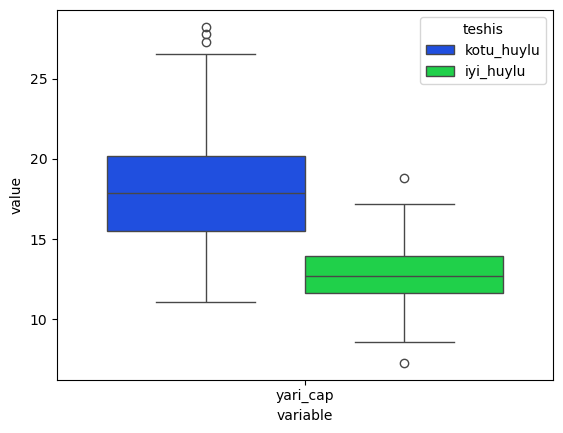

In [12]:
melted_df = pd.melt(df, id_vars = 'teshis', value_vars = ['yari_cap'])
sns.boxplot(x = "variable", y = "value", hue = "teshis", data = melted_df)
plt.show()

## İki Değişkenli Veri ve Kovaryans

- **İki Değişkenli Veri**
  - İki değişkeni karşılaştırır ve korelasyon olup olmadığına bakar.
  - x ekseni bağımsız değişken
  - y ekseni bağımlı değişken. Bağımlı çünkü y ekseni x'e bağlı. Örneğin oda sayısı(x) ile ev fiyatları(y) arasındaki ilişki iki değişkenli veriye örnektir.

- **Korelasyon:**
  - İki değişken arasındaki ilişki ama nedensellik ile karıştırmamak lazım.
  - Nedensellik kavramında iki değişken arasında bir neden-sonuç ilişkisi vardır.
  - İki değişken birbirleriyle ilişkili olabilir; ama bu, birinin nedeninin diğerini olduğu anlamına gelmez.


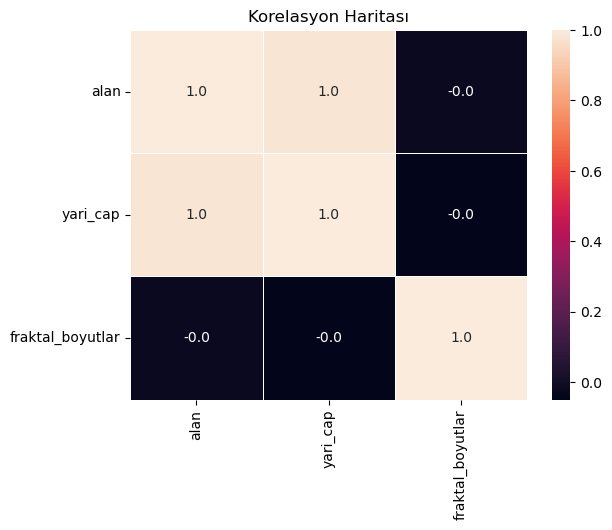

In [14]:
# corr metodu pearson korelasyonuna bakar.
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidths = 0.5, fmt = '.1f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Korelasyon Haritası')
plt.show()

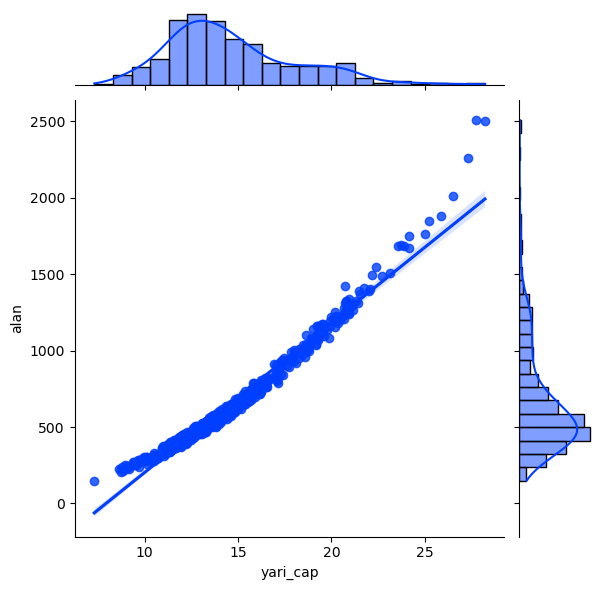

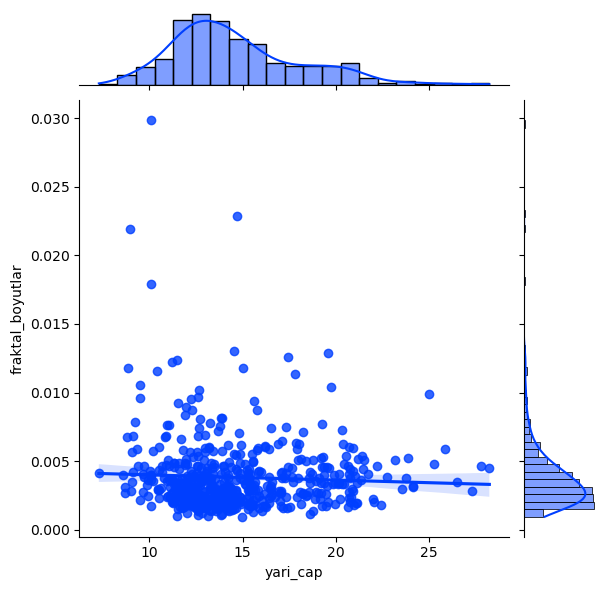

In [15]:
# korelasyonu farklı grafik tiplerinde inceleme
sns.jointplot(x = df.yari_cap, y = df.alan, data =df, kind="reg")
sns.jointplot(x = df.yari_cap, y = df.fraktal_boyutlar, data = df, kind='reg')
plt.show()

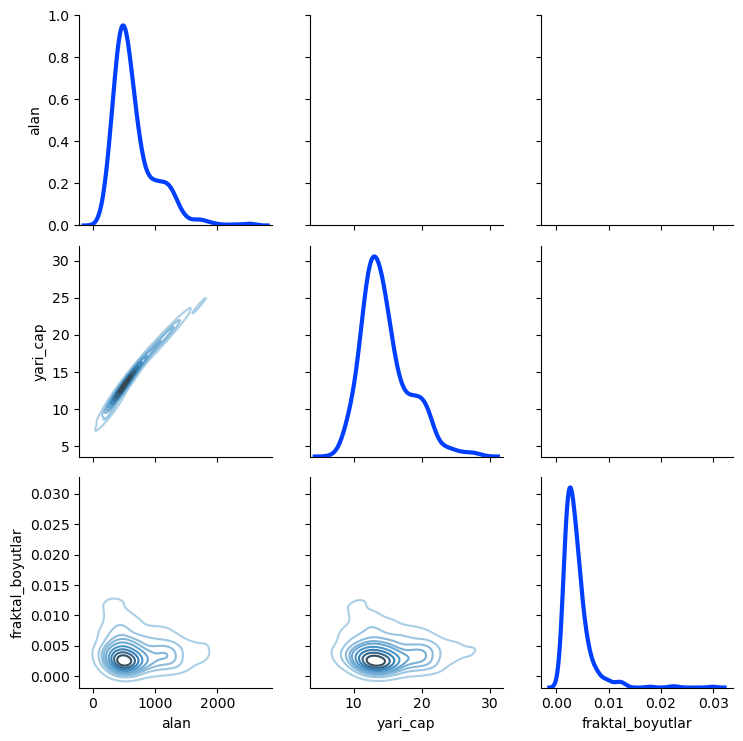

In [16]:
# birden fazla değişken için tek bir grafikte inceleme
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Pearson Korelasyon Katsayısı

- **Pearson Korelasyon Katsayısı**: Kovaryansı, değişkenlerin standart sapmasına bölerek elde edilir.
- Yarı çap ve alan arasındaki Pearson korelasyon katsayısına bakalım.
- Pearson korelasyon katsayısı, +1 ve -1 değerleri arasında değişir:
  - **+1** = pozitif doğrusal korelasyon
  - **-1** = negatif doğrusal korelasyon
  - **0** = korelasyon yok


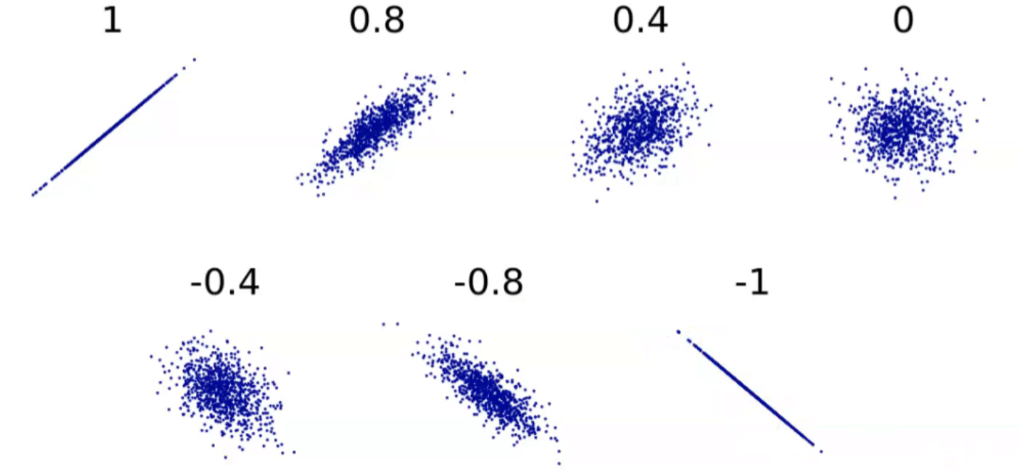

In [19]:
p1 = df.loc[:,['alan','yari_cap']].corr(method = 'pearson')
p2 = df.yari_cap.cov(df.alan) / ((df.yari_cap.std()) * (df.alan.std()))

print('Pearson Korelasyon Katsayısı: ')
print(p1)
print('Pearson Korelasyon Katsayısı:', p2)

Pearson Korelasyon Katsayısı: 
              alan  yari_cap
alan      1.000000  0.983313
yari_cap  0.983313  1.000000
Pearson Korelasyon Katsayısı: 0.9833132056513867


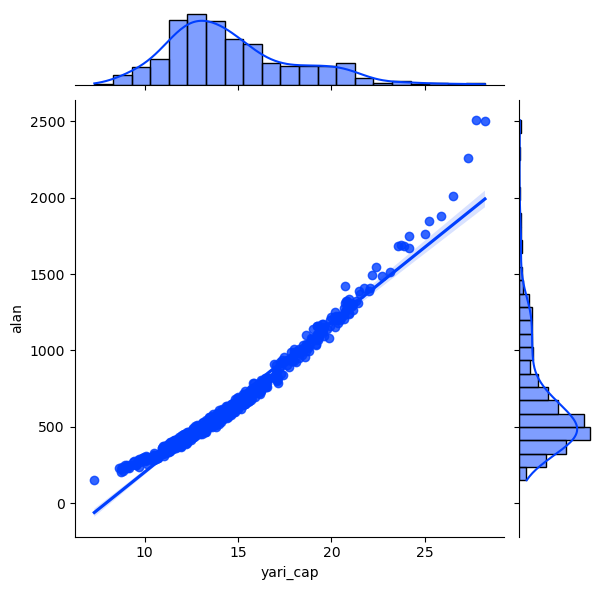

In [20]:
# görselleştirelim
sns.jointplot(x = 'yari_cap', y = 'alan', data = df, kind = 'reg')
plt.show()

## Kovaryans

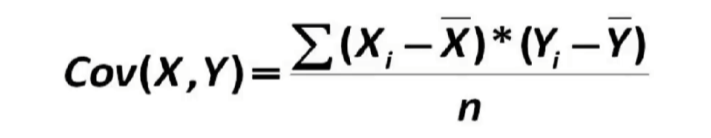

- Kovaryans, iki değişkenin birlikte değişme eğiliminin ölçüsüdür.
- Eğer iki vektör özdeş ise kovaryans maksimum olur.
- Eğer iki vektör arasında bir ilişki yoksa kovaryans 0 olur.
- Eğer iki vektör farklı yönlerde ise kovaryans negatif olur.

Yarıçap ve Alan arasındaki kovaryans:  1215.947573611788
Yarıçap ve Fraktal Boyutlar arasındaki kovaryans:  -0.00047110365714837993


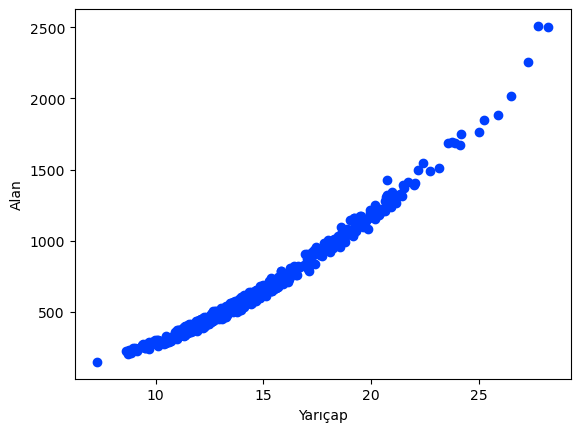

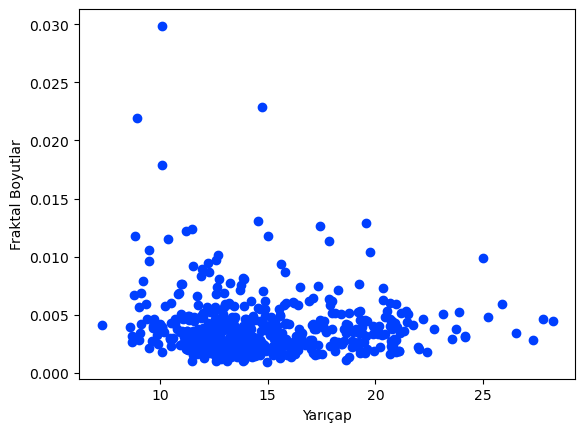

In [24]:
print('Yarıçap ve Alan arasındaki kovaryans: ', df.yari_cap.cov(df.alan))
print('Yarıçap ve Fraktal Boyutlar arasındaki kovaryans: ', df.yari_cap.cov(df.fraktal_boyutlar))

plt.figure()
plt.scatter(df.yari_cap, df.alan)
plt.xlabel('Yarıçap')
plt.ylabel('Alan')

plt.figure()
plt.scatter(df.yari_cap, df.fraktal_boyutlar)
plt.xlabel('Yarıçap')
plt.ylabel('Fraktal Boyutlar')

plt.show()

# Merkezi Eğilim

- **Mean**: Bir listenin ortalamasıdır.
- **Median**: Medyan, sıralı bir listede ortada bulunan sayıdır.
- **Mode**: Bir listede en çok bulunan sayıdır.
- **Ortalama ve Medyan**:
  - Ortalama aykırı verilerden etkilenebilir; bu nedenle medyan önemlidir.


In [26]:
yas = [5,6,7,8,8,9,10,11,13,15]

# ortalama
ortalama_yas = np.mean(yas)
print("Yaşların Ortalaması: ",ortalama_yas)

# ortanca
medyan_yas = np.median(yas)
print("Ortanca Yaş: ",medyan_yas)

# mod
mod_yas = stats.mode(yas)
print("Yaşların Modu: ", mod_yas)

Yaşların Ortalaması:  9.2
Ortanca Yaş:  8.5
Yaşların Modu:  ModeResult(mode=8, count=2)


# Ortalama ve Medyan

- Bazen ortalama kullanmak yerine medyan kullanmak gerekebilir.
- Mesela bir şirket düşünelim; bu şirkette 10 adet çalışan olsun. Bu şirketin patronu, eğer ortalama maaş 5 değerinin altındaysa her çalışana zam yapacak olsun.


In [28]:
maas = [3,2,4,1,1,2,5,4,5,2,3,5,4,5,565]
print('Ortalama Maaş: ', np.mean(maas))

Ortalama Maaş:  40.733333333333334


In [29]:
print('Maaş Medyanı: ', np.median(maas))

Maaş Medyanı:  4.0


- Buradan görüleceği üzere ortalama örneklemin genelini temsil etmiyorken, medyan örneklemin karakteristiğine uygun bir sonuca sahip.
- Bu aslında medyanın aykırı değerlerden etkilenmediğinin bir göstergesi.
- Ortalama bazı durumlarda yanıltıcı olabiliryor.
- Yukarıdaki örnekte maaş ortalamasına göre bir zam oranı belirlenecek olsaydı aslında az kazananlar çok düşük bir maaş zammıyla karşılaşabilirdi.
- Fakat medyanm üzerinden bakıldığında aslında maaş alan kişilerin hangi seviyede maaşa sahip olduğu daha aşikardır.

## Spearman Rank Korelasyonu

- Değişkenler arasındaki ilişki doğrusalsa ve değişkenler kabaca normalse Pearson korelasyonu iyi çalışır.Ancak aykırı değerler mevcutsa problem olabilir.
- Spearman korelasyonunu hesaplamak için her bir değerin sırasını hesaplamak gerekir.

In [32]:
df_rank = df.rank()
spearman_corr = df_rank.loc[:,["alan","yari_cap"]].corr(method = "spearman")
print('Spearman Korelasyonu: ')
print(spearman_corr)

Spearman Korelasyonu: 
              alan  yari_cap
alan      1.000000  0.993754
yari_cap  0.993754  1.000000


- Dağılımlar arasındaki ilişki doğrusal değilse, spearman korelasyonu ilişkinin gücünü daha iyi tahmin etme eğiliminde olacaktır.
- Pearson yöntemi aykırı değerlerden etkilenebilir. Spearman korelasyonu bu konuda daha sağlamdır.

In [34]:
# rankın ne olduğunu anlamak için bir örnek
sozluk = {'isim' : ['kenan', 'ekrem','zeynep','melike','zeynel'],
          'rapor': [4,21,5,15,6]}
veri1 = pd.DataFrame(sozluk, index = ['ankara','istanbul','mersin','izmir','konya'])
veri1

,isim,rapor
ankara,kenan,4
istanbul,ekrem,21
mersin,zeynep,5
izmir,melike,15
konya,zeynel,6


In [35]:
veri1['raporRanked'] = veri1['rapor'].rank(ascending=True)
veri1

,isim,rapor,raporRanked
ankara,kenan,4,1.0
istanbul,ekrem,21,5.0
mersin,zeynep,5,2.0
izmir,melike,15,4.0
konya,zeynel,6,3.0


# Etki Büyüklüğü

- Özet istatistiklerden biridir.
- Bir etki boyutunu tanımlar. İki grup arasındaki farkı ölçmenin basit bir yoludur.
- Başka bir deyişle, etki büyüklüğü, farkın boyutunu vurgular.
- **Cohen, d (etki boyutu):**
  - d = 0.2 ise küçük etki boyutu,
  - d = 0.5 orta etki boyutu,
  - d = 0.8 büyük etki boyutu olduğunu öne sürmektedir.
- İyi huylu ve kötü huylu kanser hücrelerinin yarıçaplarının etki büyüklüğünü karşılaştıralım.
- Etki büyüklüğü formülü.


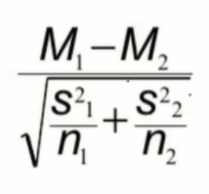

In [38]:
# veriyi iyi huylu ve kötü huylu olarak ikiye ayırıp bu iki grubun birbiri arsaında etki büyüklüğünü inceleyelim.
df_iyi = df[df['teshis'] == 'iyi_huylu']
df_kotu = df[df['teshis'] == 'kotu_huylu']

# Yukarıdaki denklemdeki pay ifadesi
# M1 : kötü huylu hücrelerin yarıçap ortalaması
# M2 : iyi huylu hücrelerin yarıçap ortalaması

M1 = df_kotu.yari_cap.mean()
M2 = df_iyi.yari_cap.mean()
pay = M1 - M2

# Yukarıdaki denklemdeki payda ifadesi
# s1^2 : kötü huylu hücrelerin yarıçap varyansı
# s2^2 : iyi huylu hücrelerin yarıçap varyansı

varyans_kotu = df_kotu.yari_cap.var()
varyans_iyi = df_iyi.yari_cap.var()

# n1 : kötü huylu hücrelere ilişkin veri sayısı
# n2 : iyi huylu hücrelere ilişkin veri sayısı

n1 = len(df_kotu)
n2 = len(df_iyi)

payda = np.sqrt(((varyans_kotu * n2) + (varyans_iyi * n1)) / float(n1 * n2))

effect_size = pay / payda
print("Etki Büyüklüğü :", effect_size)

Etki Büyüklüğü : 21.242539279949426


- Etki büyüklüğü 21 çıktı. Bu da gösteriyor ki iki grup birbirinden farklı gruplar.

# Olasılık Nedir?

- Olasılık bir şeyin olmasının veya olmamasının matematiksel değeri veya olasılık yüzdesi, değeridir.
- Olasılık 0 ve 1 arasında değerler alabilir.
  - 1 olayın kesin olduğunu, 0 ise olayın gerçekleşmediğini gösterir.
- Mesela hepimiz yazı tura atmayı biliyoruz. Bir paranın yazı gelme olasılığı **0.5**'tir.  
  \(P(\text{para yazı}) = 0.5\)
- Parayı "yazı mı, tura mı?" diyerek havaya atmaya deneme (trial) adı verilir.

## Tanımlar:

- **Deney**: Her bir deneme olayı deney olarak adlandırılır.  
- **Olay**: Ortaya çıkabilecek sonuçlar, yani "yazı" ya da "tura" olay olarak adlandırılır.  
- **Örneklem Uzayı**: Tüm olabilecek olayları kapsayan uzaydır.
  - Örnek:
    - Mesela bir zar atalım.
    - Zar atmak bir deneydir.
    - Olay: Zar atmanın sonucunda ortaya çıkabilecek sonuçlar 1, 2, 3, 4, 5, 6 değerleridir.
    - **Örneklem Uzayı** \(S = \{1, 2, 3, 4, 5, 6\}\): 6 olası çıktı.


# Permütasyon

- Matematikte permütasyon, her sembolün sadece bir veya birkaç kez kullanıldığı sıralı bir dizidir.
- Mesela 3 tane öğrenci olsun: **Ali**, **Veli** ve **Ayşe**
- Bu üç öğrenciyi kaç farklı şekilde yan yana sıralarız?  
  \(3! = 3 \cdot 2 \cdot 1 = 6\)

  - Ali, Veli, Ayşe  
  - Ali, Ayşe, Veli  
  - Veli, Ayşe, Ali  
  - Veli, Ali, Ayşe  
  - Ayşe, Veli, Ali  
  - Ayşe, Ali, Veli  

- \(n\) elemanlı bir kümenin permütasyonu \(n!\)
- \(n\) elemanlık bir kümenin \(r\) alana permütasyonu ise (tekrarlamak yasak)


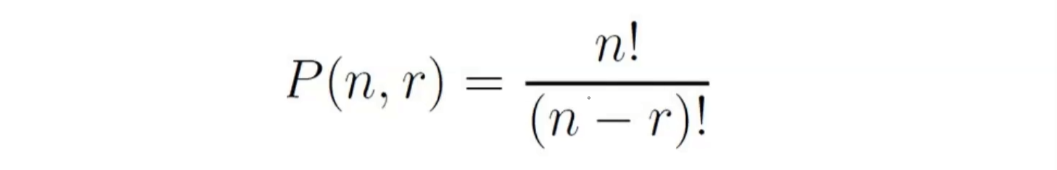

In [43]:
import math
pay = math.factorial(39)
payda = math.factorial(34)
P = (pay / payda)
print(P)

69090840.0


- Eğer her bir elemanı birden fazla kez kullanabilseydik;

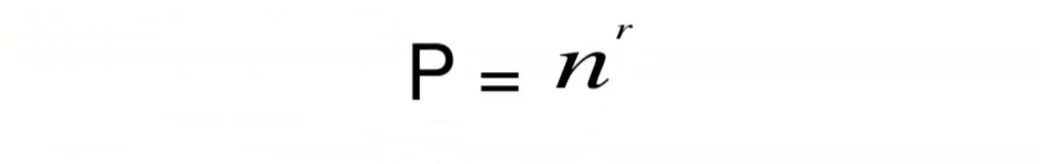

formülünü kullanacaktık.

In [46]:
P = 39**5
print(P)

90224199


## Permutasyon Örneği

* 3 farklı pantolon, 4 farklı ceket ve 2 farklı gömleği olan kişi bir ceket bir gömlek ve bir pantolonu kaç farklı şekilde giyebilir.
* P = 3·4·2 = 24
* Yada formule göre: 3!/(3-1)! * 4!/(4-1)! * 2!/(2-1)! = 24

## Kombinasyon

* Kombinasyon, bir nesne grubundan sıra gözetmeksizin yapılan seçimlerdir.
* Mesela 5 kişilik bir takımdan 2 kişi seçmek istiyoruz. Sıra gözetmeksizin 5 kişiden 2 kişi seçeriz.

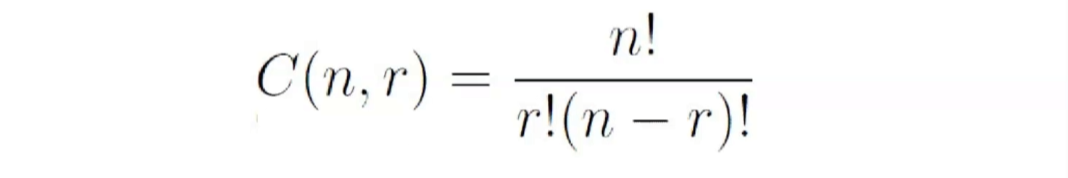

* n=5 ve r=2 sonuç: 10 farklı şekilde seçeriz

## Permütasyon ve Kombinasyon

* Bu üç öğrenciyi Ali, Veli ve Ayşe şeklinde sıralamak permütasyon; kümenin içinden sıra gözetmeksizin öğrenci seçmek ise kombinasyon manasına gelir.
* Mesela 3 öğrenciyi 2 konuma sıralayalım. 6 farklı şekilde yaparız:
  * Ali, Veli
  * Ali, Ayşe
  * Veli, Ayşe
  * Veli, Ali
  * Ayşe, Veli
  * Ayşe, Ali
* Bu üç öğrenciden 2 öğrenci seçelim:
  * Ali, Veli
  * Ali, Ayşe
  * Veli, Ayşe
* Sonuç 3 çıkar.
* Gördüğünüz gibi sıralamada: "Ali, Ayşe" ve aynı zamanda "Ayşe, Ali" ikilileri var. Bu ikililer sıralama için farklı olsa da; seçme yani kombinasyon için aynı durumlardır

## Ölçme Ölçekleri

Ölçme ölçeği 4 tanedir:

1. **Sınıflama Ölçeği (Nominal)**
   * Kategori vardır.
   * Sıralanamazlar.
   * Mesela Asya ülkeleri: Çin, Hindistan gibi
     


2. **Sıralama Ölçeği (Ordinal)**
   * Sıralanabilir ama aralarındaki sayısal ilişki anlamsızdır.
   * Mesela bir anket düşünün. Seçenekler, "asla, bazen, genelde, her zaman" olsun. "Genelde", "bazen"den daha genel bir ifade ama sayısal olarak ne kadar dediğimiz zaman bu sorunun cevabı yok. Bu tarz verilere sıralı veri denir.
   * Sınıflama ve sıralama ölçekleri arasında sıralanabilirlik açısından fark vardır.
     


3. **Aralık Ölçeği (Interval)**
   * Sıcaklık, başarı, performans gibi nicel değişkenler için kullanılır.
   * Belirli bir ölçeği vardır.
   * Başlangıç noktasının bulunmamaktadır. Mesela sıcaklık için sıfırdan başlıyor yada 10 dereceden başlıyor diyemeyiz.
   * Diğer bir ifade ile 0 değeri aralık ölçeğinde yokluk ifade etmez.
   * Son olarak, "oda sıcaklığı 20 derece ise, 10 dereceden daha sıcaktır" gibi karşılaştırmalarda bulunabiliriz.
     

4. **Oran Ölçeği (Ratio)**
   * Gerçek başlangıç noktası vardır. Mesela yaş, boy ve ağırlık gibi
   * Belirli bir ölçeği vardır.

## Ana Kütle ve Örneklem

* **Örneklem (Sample)**, ana kütle (Population) hakkında yorum yapmamızı sağlar.

* **Ana Kütle**
  * Bir gruptaki tüm üyeler
  * Mesela bir ülkedeki tüm şehirler

* **Örneklem**
  * Bir grubun alt kümesi
  * Mesela bir ülkedeki X bölgesindeki bazı şehirler gibi

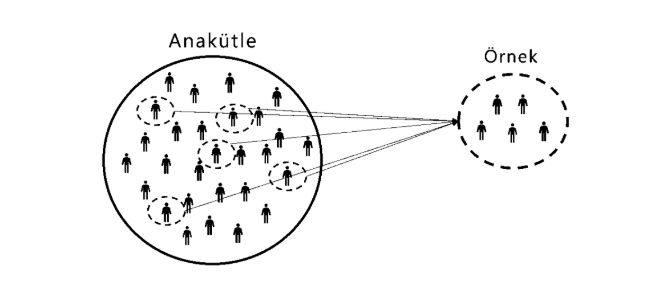

## Kesişim, Birleşim ve Tamamlayıcı

* **Kesişim:** İki olayın aynı anda olması. A ve B
* **Birleşim:** İki olayın ikisinden birinin olması. A veya B

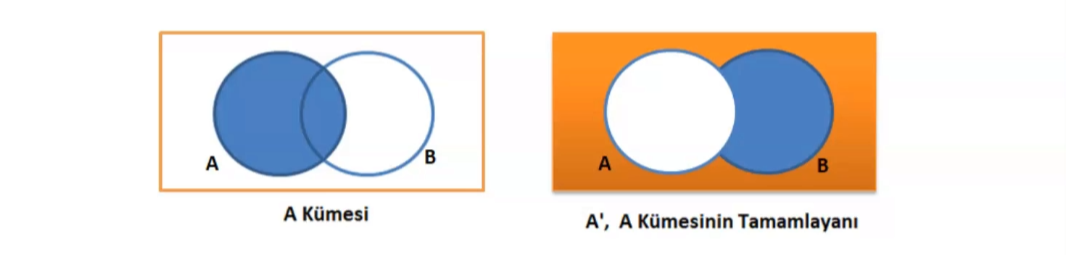
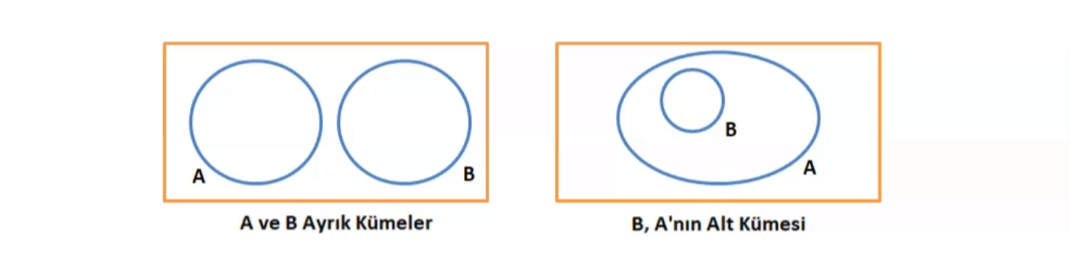
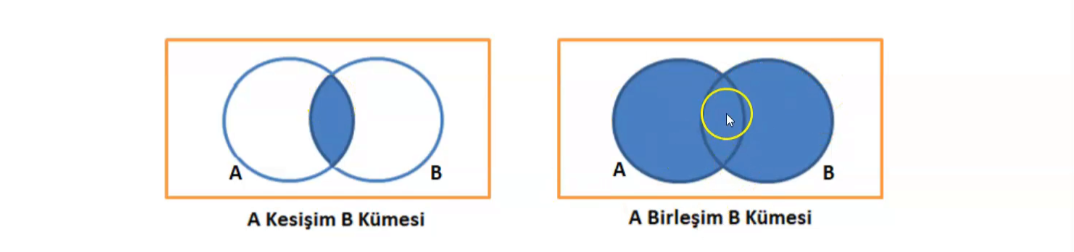

## Bağımsız ve Bağımlı Olaylar

### Bağımsız Olaylar
* İki olay birbirinden bağımsız ise, yani bir olayın sonucu diğerini etkilemiyorsa.
* **Örnek:** 5 kez zar atılacak. İlk 4 zar atma olayı gerçekleştirilmiş. 5. zar atıldığında sonucun 3 gelme olasılığı nedir? Cevap 1/6. Daha önceden atılan 4 zar, 5. atılan zar ile hiç alakalı değil. Yani bu olaylar birbirleriyle bağımsızdır.

### Bağımlı Olaylar
* İki olay birbirleriyle ilişkili ise.
* **Örnek:** Bir çantam olsun içerisinde 2 tane kırmızı, 2 tane mavi top var. Çantadan ard arda 2 kez top çekeceğim. 2. topun kırmızı olma olasılığı nedir?
* Bu durumda çantadan top çekme olayları bağımlıdır. Çünkü eğer ilk seferde kırmızı çekersem çantada 2 mavi 1 kırmızı kalır. Eğer ilk seferde mavi çekersem çantada 1 mavi 2 kırmızı kalır.

## Şartlı Olasılık

* **Şartlı olasılık:** B verildiğinde A olayın olasılığı
* **P(A|B)**
* **Örnek:** Bir zar atıldığında üstte gelen sayının 2'den büyük olduğu bilindiğine göre, zarın üst yüzüne gelen sayının çift sayı olma olasılığı kaçtır?
* **E = {1, 2, 3, 4, 5, 6}**
* 2'den büyük olma şartı (condition) **B = {3, 4, 5, 6}**
* B koşulu sağlandıktan sonra B kümesi içerisindeki çift olan sayılar (4, 6)
* Sonuç 1/2
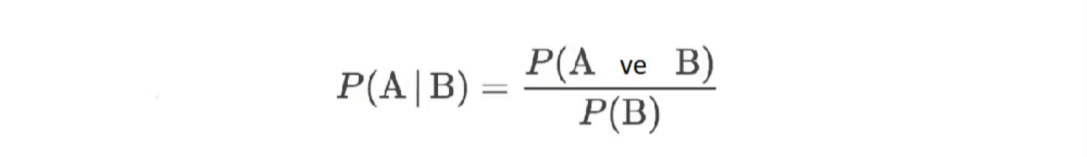
* **E = {1, 2, 3, 4, 5, 6}**
* **B = {3, 4, 5, 6}**
* **A = {2, 4, 6}**

## Şartlı Olasılık Örneği

* 52’lik bir oyun kartı destesini karıştırıyoruz. Karıştırdıktan sonra kapalı bir şekilde masaya koyuyoruz. Sonra en üstten iki tane kart çekiyoruz; ikisinin de sinek olma olasılığı nedir?
* P(sinek2 | sinek1) = P(sinek1 ∩ sinek2) / P(sinek1)
* P(sinek1) * P(sinek2 | sinek1) = P(sinek1 ∩ sinek2) = (13/52) * (12/51) = 0.0588

# Bayes Teoremi

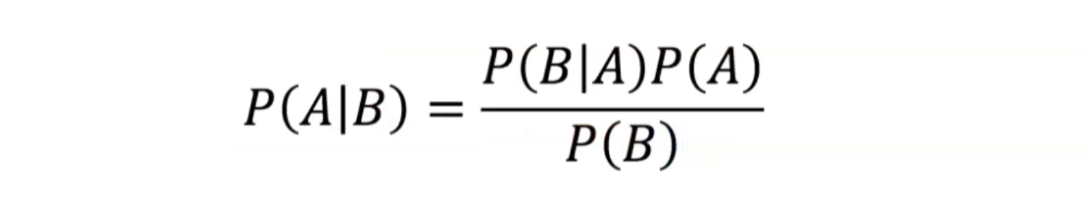

## Şartlı Olasılık Formülünün Türetilmesi

* **P(A|B):** B olayı gerçekleştiğinde A olayın gerçekleşme olasılığı
* **P(A):** A olayın gerçekleşme olasılığı
* **P(B|A):** A olayı gerçekleştiğinde B olayın gerçekleşme olasılığı
* **P(B):** B olayın gerçekleşme olasılığı

**Türetim:**

Şimdi bu formülün nasıl çıktığına bakalım

* P(A|B) = P(A ve B) / P(B)
* P(B|A) = P(B ve A) / P(A)
* P(A ve B) = P(B ve A)
* P(A/B).P(B)=P(B|A).P(A)
* P(AB) = P(B|A). P(A)/P(B)

* **P(A ve B):** Hem A hem de B olaylarının gerçekleşme olasılığıdır. Bu, A ve B olaylarının kesişim kümesinin olasılığına eşittir.
* **P(A|B):** B olayı gerçekleştiği bilindiğinde, örnek uzayımız artık sadece B olayını içeren kısma indirgenir. Bu yeni örnek uzay içinde A olayın gerçekleşme olasılığı, P(A ve B) / P(B) olarak hesaplanır. Çünkü P(B), yeni örnek uzayımızın tüm olasılıklarını temsil eder.

## Örnek: Hastalık Testi Olasılığı

* **Problem:** Bir okulda 50 öğrenci vardır. Bu öğrencilerden 1'i X hastalığına yakalanabilir. Hastalıklı bir öğrencinin testi %90, sağlıklı bir öğrencinin testi ise %10 pozitif sonuç verebilir. Test sonucu pozitif çıkan bir öğrencinin gerçekten X hastalığına sahip olma olasılığı nedir?

* **Veriler:**
  * Toplam öğrenci sayısı: 50
  * Hastalıklı öğrenci sayısı: 1
  * Hastalıklı öğrencinin testinin pozitif çıkma olasılığı: %90
  * Sağlıklı öğrencinin testinin pozitif çıkma olasılığı: %10

* **Olaylar:**
  * A: Öğrencinin hasta olması
  * B: Testin pozitif çıkması

* **Olasılıklar:**
  * P(A): Çocuğun hasta olma olasılığı = 1/50
  * P(B): Testin pozitif çıkması olasılığı = (1/50 * 0.90) + (49/50 * 0.10) = 0.116
  * P(A|B): Pozitif çıkan testin hastalık çıkma olasılığı
  * P(B|A): X hastalığına sahip çocuğun testinin pozitif çıkma olasılığı = 0.9

* **Çözüm:**
  Bayes Teoremi kullanarak:
  P(A|B) = P(B|A) * P(A) / P(B) = (0.9 * 1/50) / 0.116 ≈ %15

**Sonuç:**
Pozitif çıkan bir test sonucunun gerçekten hastalığa işaret etme olasılığı yaklaşık %15'tir.

# Olasılık Dağılımı

- Olasılık dağılımı bir rastlantısal olayın ortaya çıkabilmesi için değerleri ve olasılıkları tanımlar.
- Değerler olay için mümkün olan tüm sonuçları kapsamalıdır ve olasılıkların toplamı bire eşit olmalıdır.

## Kesikli Olasılık Dağılımları

- Kesikli Olasılık Dağılımları, rastlantısal ve sayılabilir bir olayın meydana gelmesindeki olası dağılımı tanımlar. 
  Bir yazı tura atıldığında yazı ve tura gelme ihtimali 0.5 olduğundan, iki farklı ihtimaldeki dağılımlar kesikli dağılım olup arada değer alamaz.

  - **Düzgün Dağılım**
  - **Binom Dağılımı**
  - **Poisson Dağılımı**


## Düzgün Dağılım

Düzgün dağılım, olasılık kuramı ve istatistik bilimlerinde, bir rastlantısal değişken için belirli bir alt ve üst sınır tam sayı arasında mümkün olan bir sıra tam sayı sonuç değerlerinin hepsinin eşit ölçüde olasılık göstermesi özelliğini taşıyan ayrık olasılık dağılımıdır.

Örnek Uzay:  [1 2 3 4 5 6]


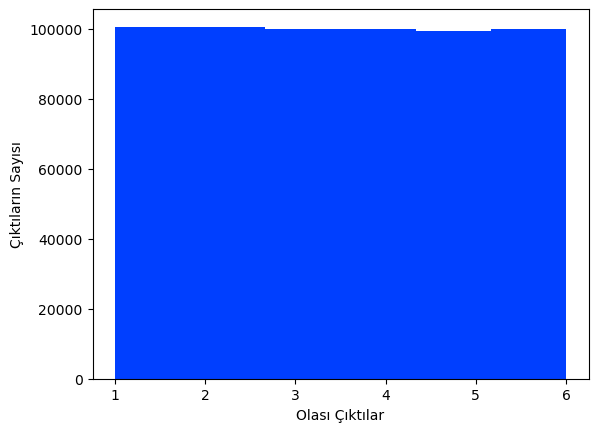

In [65]:
# zar örneği

a = np.random.randint(1,7,600000)
print("Örnek Uzay: ", np.unique(a))
plt.hist(a, bins=6) # bins : aralık sayısı
plt.ylabel("Çıktıların Sayısı")
plt.xlabel("Olası Çıktılar")
plt.show()

# Binom Dağılımı

- Binom dağılımı 2 tane kesikli sonucu (örneğin Başarılı/Başarısız, Doğru/Yanlış, 1/0) olan bir denemenin sonucuna ilişkin dağılımdır.
- En güzel örneği yazı tura atmaktır.

## Bernoulli Denemesi:
- Başarı ya da başarısızlık diye 2 tane sonucu olan rastgele deneylerdir.
  - **n** = deneme sayısı  
  - **p** = başarı olasılığı  
  - **r** = başarılı deneme sayısı  
  - Denemeler birbirinden bağımsızdır.


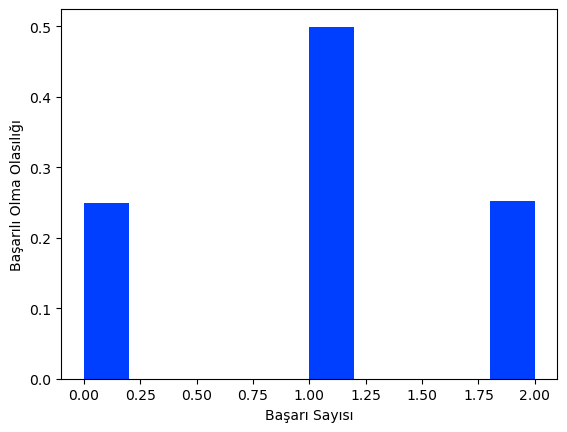

In [67]:
# yazı tura örneği

n = 2 # toplam deneme sayısı
p = 0.5 # her bir denemede başarılı olma olasılığı
s = np.random.binomial(n, p, 10000) # 10000 = test sayısı
agirlik = np.ones_like(s) / float(len(s)) # tümü 1 lerden oluşan bir diziyi elimizdekid izye bölerek standardizasyon gerçekleştiriyoruz.
plt.hist(s, weights = agirlik)
plt.xlabel("Başarı Sayısı")
plt.ylabel("Başarılı Olma Olasılığı")
plt.show()

# Binom Dağılım Örneği

- Bir zar 10 kez atılıyor. 4 kere 6 sayısı gelme olasılığı nedir?


In [69]:
n = 10
r = 4 # başarı ölçütü
p = 1/6 # başarı oranı
# scipy kütüphanesi ile çözüm
from scipy.stats import binom
print(binom.pmf(r,n,p))

# binom açılım formülüne göre sonuç
import math
print((math.factorial(n)/(math.factorial(n-r)*math.factorial(r)))*(p**r)*(1-p)**(n-r))

0.054265875850988195
0.05426587585098817


## Poisson Dağılımı

- **Binom**: n deneme sonucunda başarı sayısı  
- **Poisson**: birim zaman başına başarı sayısı  
- **lambda** = oluşum sayısı / süre(aralık)  
  - süre(aralık), zaman olabilir veya mesafe olabilir  
- Örneğin lambda = 10 olsun. Bir taşımacılık şirketi için bu değer her bir saatte ortalama 10 kamyon anlamına gelebilir.


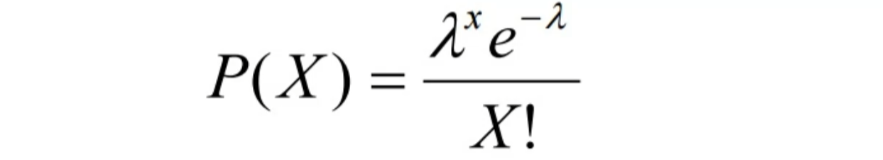

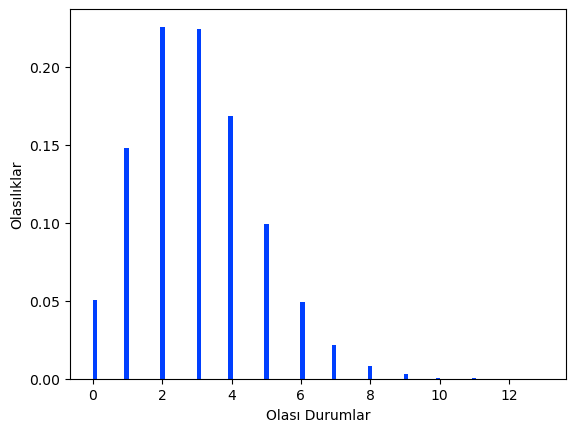

In [72]:
# örnek : bir depoya birim saatte 3 kamyon girme olasılığının görselleştirmesi

lambda_ = 3
s1 = np.random.poisson(lambda_, 100000)
agirlik = np.ones_like(s1) / float(len(s1))
plt.hist(s1, weights = agirlik, bins = 100)
plt.xlabel("Olası Durumlar")
plt.ylabel("Olasılıklar")
plt.show()

## Sürekli Olasılık Dağılımları

- Olasılık Yoğunluk Fonksiyonu (Probability density function - PDF) - Kümülatif Dağılım Fonksiyonu (Cumulative distribution function - CDF)
- Normal Dağılım ve Z-Skoru

## Olasılık Yoğunluk Fonksiyonu - Kümülatif Dağılım Fonksiyonu

- **PDF**: Probability Density Function  
- **CDF**: Cumulative Distribution Function


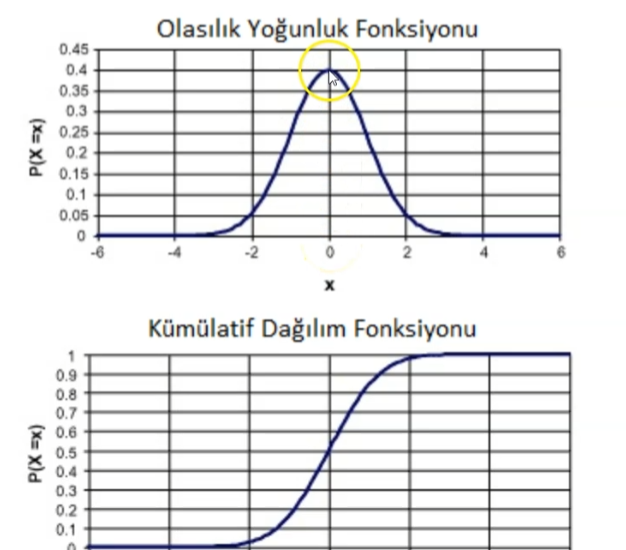

# İstatistik

- İstatistik, verilerin toplanması, organizasyonu, analizi, yorumlanması ve sunulması ile ilgilenen bir matematik dalıdır.
- Özetle istatistikte amacımız:
  - Elimizde bir grup var, çok büyük bir grup (population).
  - Bu grup içerisinden rastgele seçim yapıp küçük bir grup oluşturuyoruz (sample or sub-group).
  - Artık küçük bir grubumuz var. Biz istatistik ile bu küçük grubun karakteristiğini anlamaya çalışıyoruz.
  - Küçük gruptan istatistiksel çıkarımlar yaparak büyük grubu tanımlamaya çalışıyoruz.
  - İstatistiksel çıkarımlar yapmak için de değişkenlerden faydalanıyoruz. Bu değişkenler, grubun içerisindeki her bir bireyi tanımlayan karakteristik özelliklerdir. Örneğin yaş, maaş, cinsiyet gibi.


# Örnekleme

- Örnekleme, büyük bir gruptan rastgele bireyler seçerek küçük bir grup oluşturmaktır.
- Burada önemli olan bir yere eğilim yapmadan örnekleme yapabilmektir.
- **Eğilim ne demek?**  
  Mesela bir maç sonucu tahmini yapmak istiyoruz. X takımı - Y takımı futbol maçı var. İlk önce kendimize gidip örnekleme yaparak bir alt grup oluşturmak zorundayız. Eğer bizim alt grubumuzun örnekleri sadece X takımı taraftarından seçersek biz alt grubumuzu eğilimli seçmiş oluruz. Böylece istatistiksel analiz sonucumuz X takımına eğilimli bir sonuç verir.
  
- **Örnekleme Tipleri:**
  - **Rastgele Örnekleme:**
    - Bir grup içinden rastgele seçim yapmak
    - Bir futbol maçında forma rengine bakmadan rastgele seyirci seçmek
  - **Katmanlı Rastgele Örnekleme:**
    - İlk önce belirli bir karakteristiğe göre büyük grubu parçalara ayırıp daha sonra bu parçalar içerisinden seçmek
    - Bir futbol maçında ilk önce seyirciyi takımlarına göre parçalara ayırıp daha sonra gruplardan rastgele seçmek.

  - **Kümeleme Örnekleme:**
    - Bir ana kütleyi birden fazla küçük gruba bölerek grup seçmek.
    - Mesela öğrenci başarısı araştırması yapılmak isteniliyor. Tüm ana kütle, yani Türkiye, örneğin şehirler bazında farklı kümelere bölünüyor; daha sonra bu kümelerden bazıları seçilerek araştırma yapılıyor.


## Normal Dağılım ve Z-Skoru

* Bu dağılım iki parametreyle tam olarak tanımlanabilir:
    * Bunlar konum gösteren ortalama (μ, aritmetik ortalama) ve ölçek gösteren varyans (σ², "yayılım")dır.
* Normal dağılımın önemli olmasının bir sebebi gerçek hayatta pek çok örneği olması.
    * IQ
    * Boy ve kilo
* Simetriktir. Bir ortalama değeri etrafında belirli bir standart sapmaya göre dağılım gösterirler.
* Normal dağılım ile ilgili bir örnek yapalım.
    * Tüm dünyada ortalama IQ değerine 110 diyelim.
        * Bazı insanlar süper zeki olarak adlandırılırlar ve IQ değerleri 110 üzerindedir. Nadir de olsa 150-160 IQ değerine sahip insanlar vardır
        * Bazı insanların IQ değerleri ise 110'un altında olabilir.
    * Bu bilgilerden yola çıkarak ortalama IQ değerine 100 diyelim ve standart sapması ise 20 olsun.
* Şimdi normal dağılım parametreleri doğrultusunda görselleştirme yapalım.

Ortalama:  109.9753787804828
Standart Sapma:  19.961858465818054


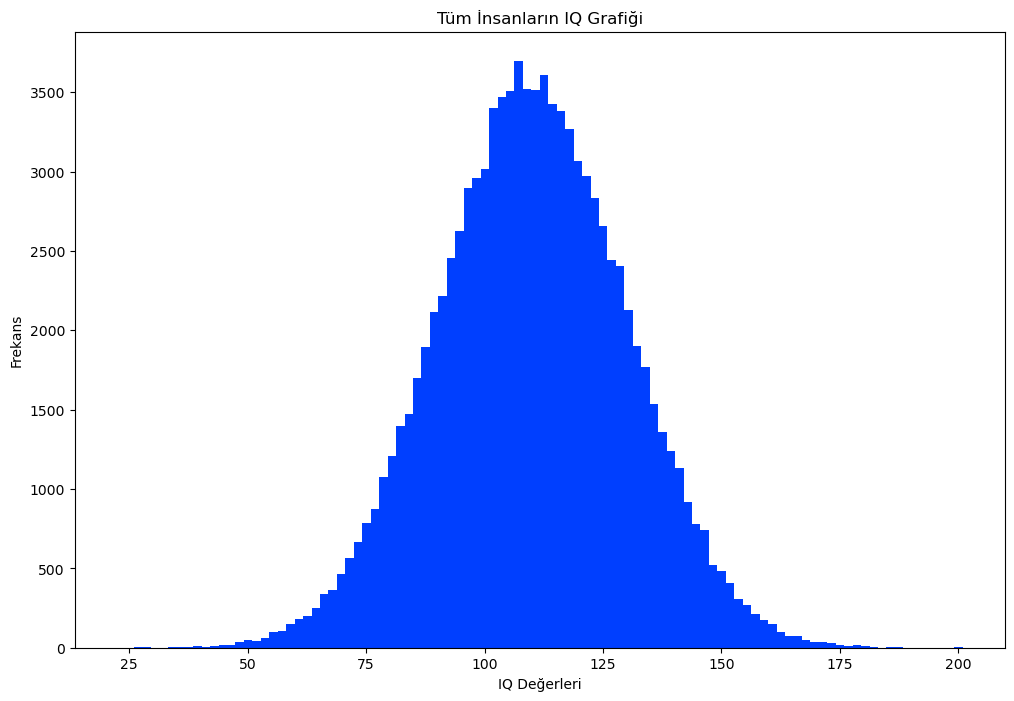

In [78]:
mu = 110
sigma = 20
s = np.random.normal(mu, sigma, 100000)
print("Ortalama: ", np.mean(s))
print("Standart Sapma: ", np.std(s))
plt.figure(figsize=(12,8))
plt.hist(s, 100)
plt.title("Tüm İnsanların IQ Grafiği")
plt.xlabel("IQ Değerleri")
plt.ylabel("Frekans")
plt.show()

## Histogram Analizi ve Z-Skoru

* **Histogramdan görülebileceği üzere,** pek çok insan normal dağılımın ortalaması olan 110 IQ seviyesinde toplandı.
* Ama daha önceden de bahsettiğim gibi 175 ve 50 IQ değerlerine sahip insanlar da mevcut.
* **Peki IQ değeri 80 ve 140 arasında olan insanların sayısını bulmak için ne yapacağız?**
* Bu sorunun cevabını vermek için **z-skorunu** kullanacağız.

   * z = (x - ortalama) / (standart sapma)
   * z1 = (80 - 110) / 20 = -1.5
   * z2 = (140 - 110) / 20 = 1.5

* Ortalama ve 80 arasında 1.5 standart sapmalık mesafe var. Ortalama ve 140 arasında ise 1.5 standart sapmalık mesafe var.
* Z tablosuna baktığımız zaman 1.5 standart sapma 0.4332 sayısına karşılık geliyor.

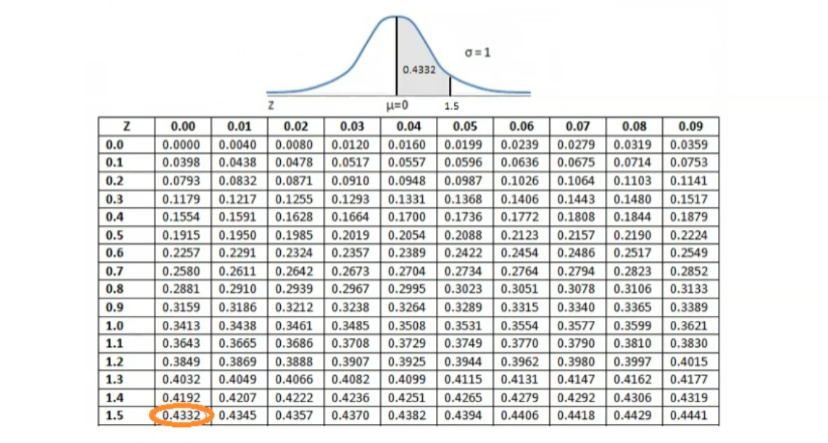

- Buradan hareketle 80 ve 140 arası sorulduğundan bu sonucun iki katını yani 3 standart sapmaya karşılık gelecek oranı alırsak bu da 0.8664 yani %86.64'lük bir kesimi oluşturuyor

## Merkezi Limit Teoremi

Merkezi limit teoremi, istatistikte çok önemli bir kavramdır. Büyük bir veri kümesinden alınan örneklerin ortalamalarının, örneklem büyüklüğü arttıkça normal dağılıma yaklaştığını belirtir. Başka bir deyişle, farklı dağılımlara sahip verilerden alınan örneklerin ortalamaları, normal dağılıma benzer bir dağılım göstermeye başlar.

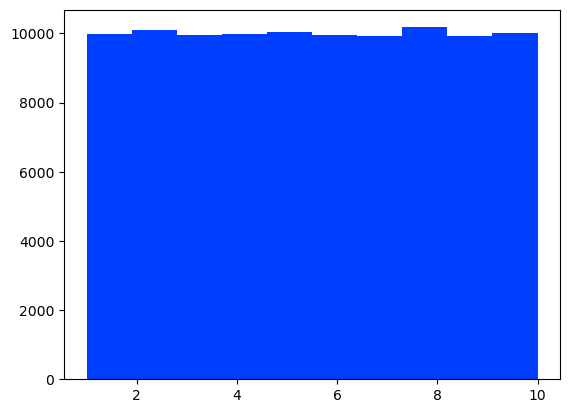

In [83]:
# 0 ile 10 arasında 100000 adet tasm sayı oluşturalım

x = np.random.random_integers(10, size = 100000)

plt.hist(x)
plt.show()

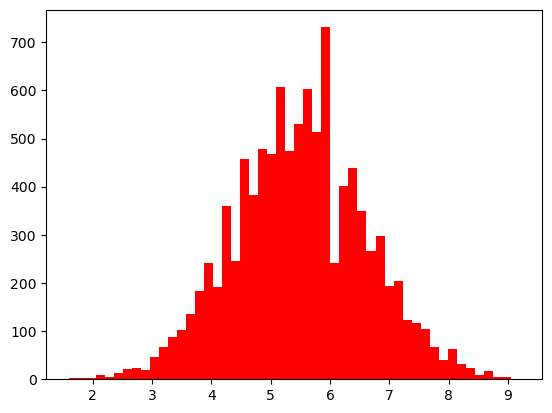

In [84]:
# alınan örneklerin normal dağılım gösterip göstermediğine bakalım.

ortalama_ornek = []
for i in range(10000):
    ornek = random.randrange(5,10)
    ortalama_ornek.append(np.mean(random.sample(list(x),ornek)))
plt.hist(ortalama_ornek, bins = 50, color = "red")
plt.show()

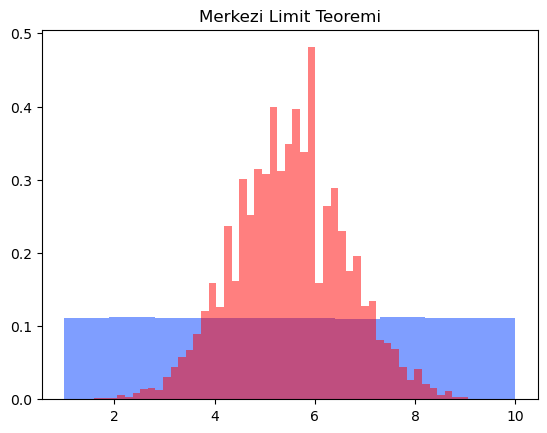

In [85]:
plt.hist(x, alpha = 0.5, density = True)
plt.hist(ortalama_ornek, bins = 50, color = "red", alpha = 0.5, density = True)
plt.title("Merkezi Limit Teoremi")
plt.show()

## Standart Hata

* Standart hata, bir sınamada seçilebilecek tüm örneklerden sadece bir tanesine dayalı kestirimlerin içerdiği hata oranıdır.

* **N** = ana kütledeki birey sayısı
* **P** = ana kütle parametresi
* **sigma** = ana kütle standart sapması
* **n** = örnekleme yaptıktan sonra alt gruptaki birey sayısı
* **p^** = örnekleme istatistiği
* **SE** = örneklemenin standart hatası

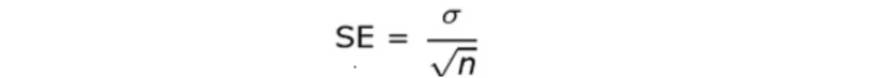

## Örnek

* **Bir popülasyonun IQ seviyesi normal dağılım şeklinde olsun.**
  * Ortalama = 100 ve standart sapma = 15

* **Elimizde 10 farklı kişi var ve IQ ortalaması 104. Biz bu 10 kişi için ana kütlemizin bireyleri diyebilir miyiz?**
  * n = 10, x̄ = 104
  * SE = 15 / √10 ≈ 4.7
  * Bu sonuca göre diyebiliriz ki, 10 bireyin IQ'su yaklaşık olarak %68 olasılıkla 95.3 ile 104.7 arasında değişir.

## Hipotez Testi

* **Hipotez Testi**, istatistiksel metotların gerçek hayat problemlerine uygulanmasıdır.
* **Sıfır Hipotezi**, beklenenin dışında bir durumun olmadığını, mesela gruplar ya da değişkenler arasında bir ilişki bulunmadığını veya ölçülen iki olgunun arasında bir fark olmadığını kabul eden genel bir önermedir.
    * Örneğin "Dünya düzdür" hipotezi. Bu hipotez ya reddedilir (reject) ya da reddedilemez (fail to reject).
* **Eğer sıfır hipotezi reddedilirse** bir tane **Alternatif Hipotez** oluştururuz. Mesela "Dünya yuvarlaktır" hipotezi.
* **Gerçek dünya problemini nasıl hipoteze dönüştürdüğümüze bakalım.**
    * İlk önce bir sıfır hipotezi oluşturuyoruz, başlangıçta bu sıfır hipotezi doğru olarak kabul ediyoruz ve sonra çürütmeye (reddetmeye) çalışıyoruz. Eğer veri sıfır hipotezini reddederse alternatif hipotezler oluşturmaya başlıyoruz.
    * **Sıfır hipotezi:** "Ankara'da insanların boy ortalaması 2 metre" olsun.
    * **Alternatif hipotez:** "Ankara'da insanların boy ortalaması 2 metre değil"
    * Başlangıçta Sıfır hipotezi doğru olarak kabul ediyoruz demiştik. Şimdi ilk önce verimizi topluyoruz.

## Hipotez Testinde p-Değeri ve Karar Verme

* **Sonra test istatistiklerini kullanarak p-değerini buluyoruz.**
* **p-değerini 0.05 ile karşılaştırıyoruz. 0.05 ≡ anlamlılık seviyesi**
* **Eğer p-değeri < 0.05 (anlamlılık seviyesi) (güven seviyesi %95)**
    * **Sıfır hipotezini reddediyoruz.** p-değeri düşükse, sıfır hipotezin doğru olma ihtimalinin düşük olduğu sonucuna varıyoruz.
* **Eğer p-değeri > 0.05, sıfır hipotezi reddetmiyoruz.**

## Hipotez Testi Örneği

* **Bir araba firması park sensörü yapıyor.**
* **Bu sensör ortalama 3 milisaniyede bir örnek alıyor ve bu sürenin hata payı 0.6 ms. Yani 2.4-3.6 ms arasında ölçüm alabilir.**
  * ortalama = 3 ms ve standart sapma = 0.6 ms
* **Araba firması sahibi "Bu süreyi azaltalım; 3 ms çok fazla!..." diyor ve bunun için bir mühendisi işe alıyor.**
* **Ayrıca firma sahibi %99'luk bir oranla bu sensörün daha kısa sürede ölçüm almasını istiyor. Yani confidence level = %99 => α = 0.01**
* **Mühendisler çalışıyor ve bu sensörü geliştirdikten sonra 50 kez test ediyor. Sonuç bu sensör artık ortalama 2.8 ms'de bir ölçüm alabiliyor. Yani n = 50 ve yeni ortalama = 2.8 ms**
* **Soru şu: yeni sensör ile alınan bu ölçümler istatistiksel olarak bir önceki sensör ile alınan ölçümlerden daha iyi, yani hızlı mı?**
* **Burada iki olasılık var. Birincisi, "evet mühendisler iyi iş çıkardı ve sensor daha hızlı". İkincisi, "Hayır, zaten ilk sensörde 0.6'lık bir hata payı vardı; bu nedenle 2.8 ms olan yeni sonuç şans eseri çıkmış olabilir".**
* **Bu sorunun cevabını bize hipotez testi verecek.**

## Hipotez Testi Süreci

* **İlk olarak sıfır hipotezi belirleniyor. Sonra alternatif hipotez**
    * **Sıfır hipotezi: ortalama >= 3** (burada sıfır hipotezini çürütmeye (reddetmeye) çalışacağız)
    * Sıfır hipotezi, gözlemlenen verileri kullanarak yanlış oldukları ispat edilebilecek açıklamalardır.
    * **Alternatif hipotez: ortalama < 3**
* **Level of significance = 0.01** ("99% confidence interval" araba firması sahibi belirlemişti)
* **Test tipi: sol kuyruk** (alternatif hipoteze bakılır)

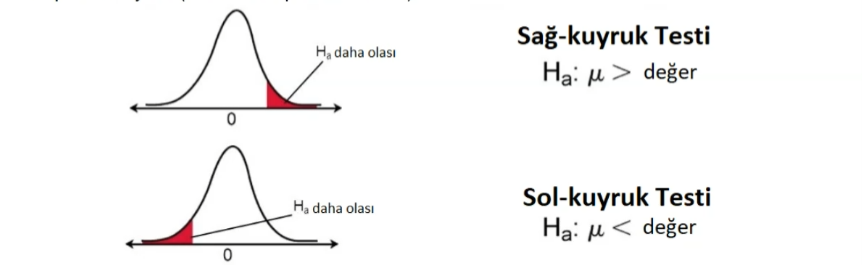
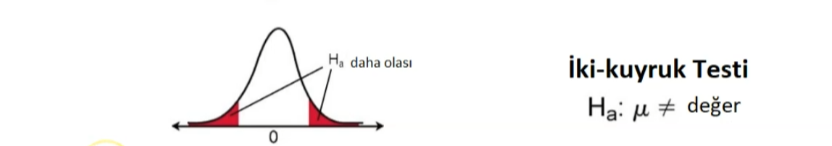

* **P-değeri bulmak için test istatistiği kullanıyoruz.**

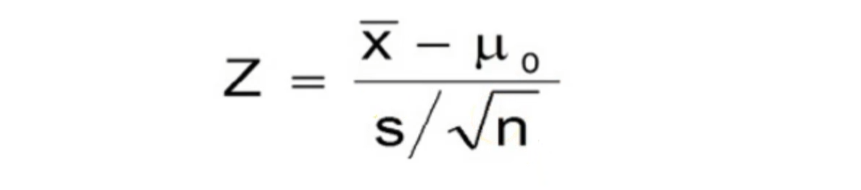

- Z = 2.8 - 3 / (0.6 / karekök(50)) = -2.35

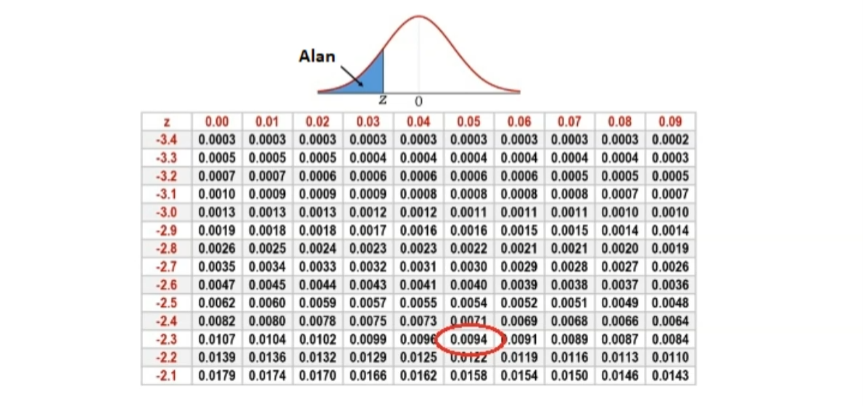

- P = 0.0094 olarak bulunur. Yani istenen seviyenin altında ve alternatif hipotezi onaylar seviyede.
- Sensör hızlanmış ve proje başarılı olmuş.

## Tip 1 ve Tip 2 Hatalar

* **Tip 1 hata**, gerçek bir sıfır hipotezinin reddedilmesidir. Tip 2 hata ise yanlış bir sıfır hipotezinin reddedilmemesidir.
* **Sıfır Hipotezi üzerine kuruludur.**

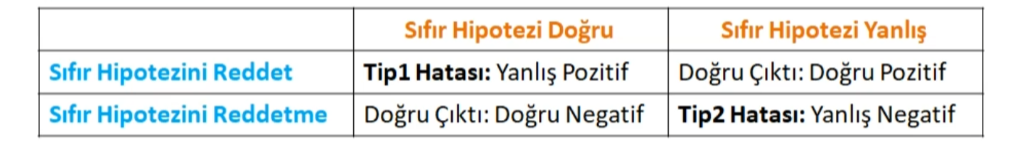

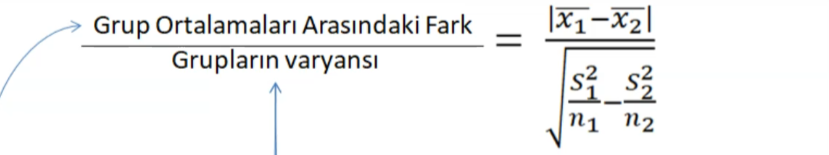

In [101]:
s1 = np.array([14.77200899, 13.42816619, 14.66036878, 15.19216730, 14.11779272,
               15.91338443, 14.45165434, 15.56649854, 14.09188975, 14.33691790,
               14.84977606, 14.80084897, 13.28187672, 15.79341007, 15.90474425,
               13.93361442, 15.99082590, 14.51404644, 13.17303546, 13.48048276, 
               14.49522366
])

print("Ortalama 1: ", np.mean(s1))
print("Standart Sapma 1: ", np.std(s1))
print("Varyans 1: ", np.var(s1))


s2 = np.array([15.35639034, 15.51945472, 13.63229864, 15.79010018, 14.46618082, 14.29817562,
               14.15511997, 15.96035775, 15.26697271, 13.56085579, 15.27545273, 14.02953527,
               14.01064277, 14.72797986, 15.81861664, 13.32661101, 15.37586395, 14.34953496,
               13.69638694, 15.89417509, 15.57710936])

print("Ortalama 2: ", np.mean(s2))
print("Standart Sapma 2: ", np.std(s2))
print("Varyans 2: ", np.var(s2))

Ortalama 1:  14.607082554761902
Standart Sapma 1:  0.8632770606699296
Varyans 1:  0.7452472834789132
Ortalama 2:  14.766086434285713
Standart Sapma 2:  0.8517762513911227
Varyans 2:  0.725522782433913


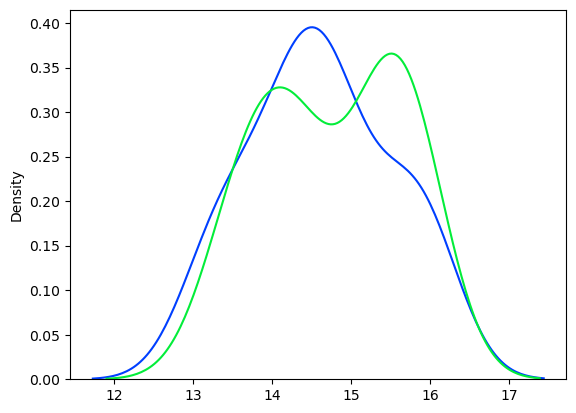

In [102]:
# görselleştirelim
sns.kdeplot(s1)
sns.kdeplot(s2)
plt.show()

In [103]:
t_val = np.abs(np.mean(s1) - np.mean(s2)) / np.sqrt((np.var(s1)/len(s1)) + (np.var(s2)/len(s2)))
print("T-Değeri: ", t_val)

T-Değeri:  0.6008208246058959


## A/B Testi

* A ve B diye iki farklı içeriğe sahip model oluşturulur.
* A ve B içerikleri farklı kullanıcılara sunulur.
* Kullanıcılardan alınan geri bildirime göre A/B içeriklerinin başarımı elde edilir.

## Dağılım

* **Aralık (Range):** Bir listede en büyük ve en küçük sayı arasındaki fark

* **Varyans:**
    * Varyans değişkenliğidir.
    * Listedeki tüm noktaların ortalamadan ne kadar uzaklıkta olduğuna ilişkin bir ölçüttür.

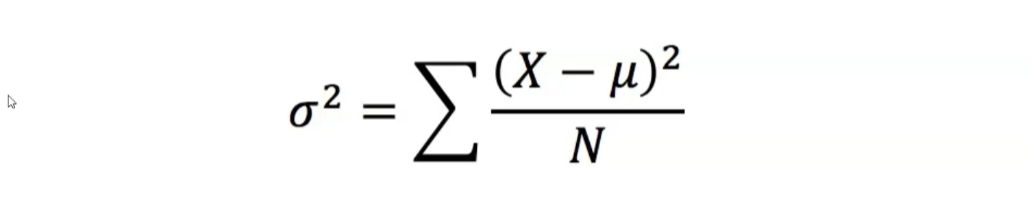

* **Bazı formüllerde N yerine (N-1) olabilir.** Bu örneklem varyansı (N-1) ve ana kütle varyansı (N) diye iki farklı kavram olmasından kaynaklanmaktadır.

* **Standart Sapma (std):**
    * Varyansın kare köküdür.
    * İlerde göreceğimiz dağılımlarda bir dağılım içindeki değerlerin ortalama olan uzaklıklarının ne kadar olduğunu belirtmek için kullanacağımız bir kavramdır. Çok kullanılan ve önemli bir kavramdır.

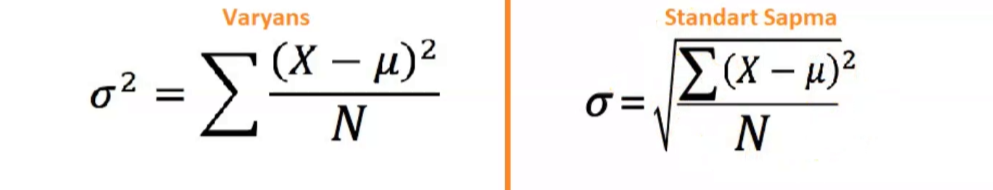

In [142]:
yas = [16, 45, 32, 55, 23, 25, 37, 48, 57, 19, 29, 53, 19, 45, 60, 18, 23]
print("Aralık: ", (np.max(yas) - np.min(yas)))

Aralık:  44


In [146]:
# Varyans Hesabı

print("Varyans: ", np.var(yas))
var_ = sum( (yas - np.mean(yas))**2 / len(yas))
print("Yukarıdaki formüle göre kendi yazdığımız fonksiyonda varyans: ", var_)

# Standart Sapma Hesabı

print("Standart Sapma: ", np.std(yas))
std_ = np.sqrt(sum( (yas - np.mean(yas))**2 / len(yas)))
print("Yukarıdaki formüle göre kendi yazdığımız fonksiyonda standart sapma: ", std_)

Varyans:  223.30795847750863
Yukarıdaki formüle göre kendi yazdığımız fonksiyonda varyans:  223.30795847750863
Standart Sapma:  14.943492178119165
Yukarıdaki formüle göre kendi yazdığımız fonksiyonda standart sapma:  14.943492178119165


X1'in ortalaması 15.18076158825274, medyanı 15.421716757909838 ve standart sapması 2.80512580517768'dır.
X1'in ortalaması 14.191509827699218, medyanı 13.651914997582347 ve standart sapması 8.454187722335236'dır.


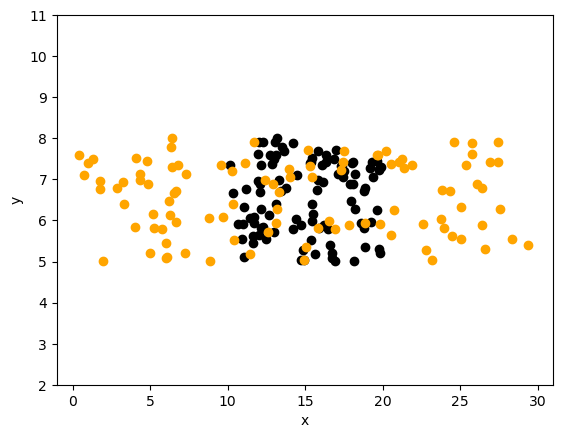

In [150]:
# ortalamaları ve medyanları aynı, standart sapmaları farklı olan veriler
y = np.random.uniform(5,8,100) # 5 ile 8 arasında düzgün dağılıma uygun 100 adet veri oluştur
x1 = np.random.uniform(10,20,100) # 10 ile 20 arasında düzgün dağılıma uygun 100 adet veri oluştur
x2 = np.random.uniform(0,30,100) # 0 ile 30 arasında düzgün dağılıma uygun 100 adet veri oluştur
plt.scatter(x1,y,color="black")
plt.scatter(x2,y,color="orange")
plt.xlim([-1,31])
plt.ylim([2,11])
plt.xlabel("x")
plt.ylabel("y")
print("X1'in ortalaması {}, medyanı {} ve standart sapması {}'dır.".format(np.mean(x1), np.median(x1), np.std(x1)))
print("X1'in ortalaması {}, medyanı {} ve standart sapması {}'dır.".format(np.mean(x2), np.median(x2), np.std(x2)))